# NUMPY PRACTICE

In [1]:
import numpy as np

## 1. Vector and Matrix Calculation

In [2]:
def compute_vector_length(vector):
    return np.linalg.norm(vector)

def compute_dot_product(vector1, vector2):
    return vector1.dot(vector2)

def matrix_multi_vector(matrix, vector):
    return matrix.dot(vector)

def matrix_multi_matrix(matrix1, matrix2):
    return np.matmul(matrix1, matrix2)

In [3]:
m1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3], [6, 1], [0, -1]])
result = matrix_multi_matrix(m1, m2)
print(result)


[[  6  -1]
 [-16 -10]]


## 2. Cosine Similarity

In [4]:
def compute_cosine(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [5]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))

0.577


## 3. Background Subtraction

In [6]:
import cv2

In [7]:
class BackgroundReplacer:
    """
    Replace the background of an object image using NumPy operations.
    """
    
    def replace(self, 
                green_bg_path, 
                target_bg_path, 
                object_path, 
                img_size = (678, 381)):
        """
        Replace the green background in the object image 
        with the target background.
        
        Args:
            green_bg_path (str): Path to the reference green background image.
            target_bg_path (str): Path to the target background image.
            object_path (str): Path to the object image (with green background).
        
        Returns:
            np.ndarray: Image with replaced background.
        """
        # Load and resize
        images = self._load_and_resize(
            img_size = img_size,
            green_background = green_bg_path,
            target_background = target_bg_path,
            object_image = object_path       
        )
        
        
        # Difference (NumPy)
        diff_map = self._compute_difference(
            images['green_background'],
            images['object_image']
        )
        
        
        # Binary mask (NumPy)
        mask = self._create_binary_mask(diff_map)
        
        # Apply mask (NumPy broadcasting)
        output = np.where(
            mask[:,:, None] == 255, 
            images['object_image'], 
            images['target_background']
        )
        
        return output
    
    def _load_and_resize(self, img_size = (678, 381), **kwargs):
        result = {}
                
        for name, img_path in kwargs.items():
            image = cv2.imread(img_path, 1)
            if image is None:
                raise FileNotFoundError(f"Could not load image from {img_path}")
            
            image = cv2.resize(image, img_size)
            result[name] = image
        return result
    
    def _compute_difference(self, bg_img, obj_img):
        """Compute grayscale difference using NumPy instead of cv2.absdiff."""
        diff = np.abs(obj_img.astype(np.int16) - bg_img.astype(np.int16))
        
        gray_diff = (
            0.299 * diff[:,:,2] +
            0.587 * diff[:,:,1] +
            0.114 * diff[:,:,0]
        ).astype(np.uint8)
        
        return gray_diff
    
    def _create_binary_mask(self, diff_map, threshold = 30):
        """Binarize grayscale difference with NumPy (no cv2.threshold)."""
        mask = (diff_map > threshold).astype(np.uint8) * 255
        return mask

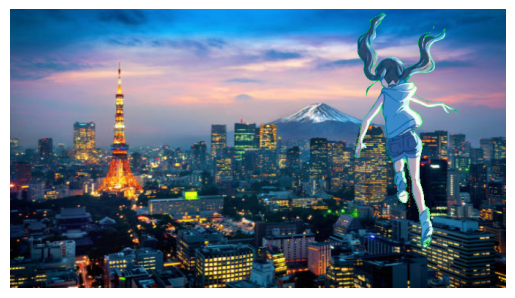

In [8]:
import matplotlib.pyplot as plt

replacer = BackgroundReplacer()

output_img = replacer.replace(
    green_bg_path= 'assets/GreenBackground.png',
    target_bg_path= 'assets/NewBackground.jpg',
    object_path=  'assets/Object.png'  
)

plt.imshow(cv2.cvtColor(output_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



## Practice

### Image processing

Lightness method: 102.5
Average method:   107.66666666666667
Luminosity method: 126.22999999999999


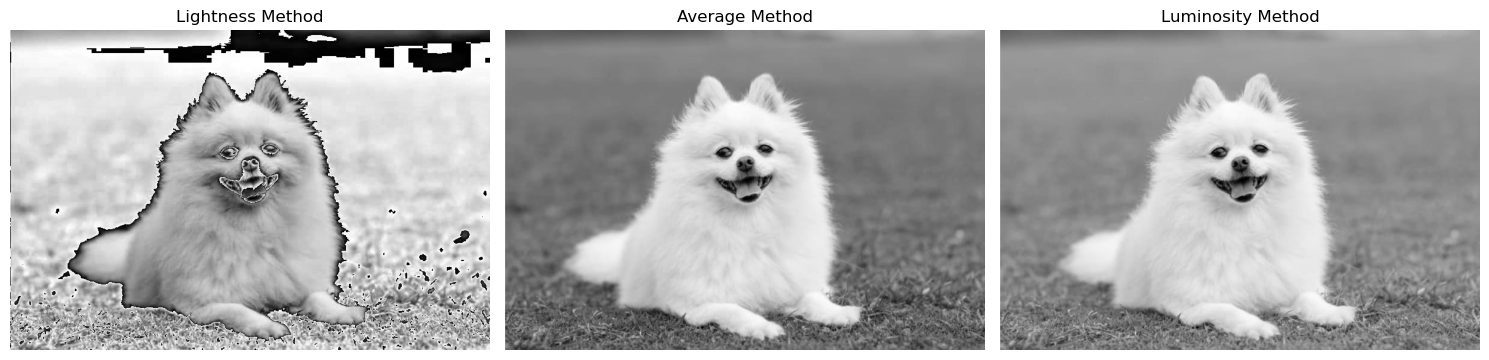

In [20]:
import matplotlib.image as mpimg
import numpy as np

# Load an RGB image (as a NumPy array)
img = mpimg.imread("assets/dog.jpeg")

def cvt_RGB_to_gray_lightness(img: np.ndarray) -> np.ndarray:
    """
    Convert an RGB image to grayscale using the Lightness method.
    
    Formula:
        Gray = (max(R, G, B) + min(R, G, B)) / 2

    Args:
        img (np.ndarray): Input RGB image of shape (H, W, C).
    
    Returns:
        np.ndarray: Grayscale image of shape (H, W).
    """
    # Take maximum and minimum across the color channels (axis=2 -> RGB dimension)
    max_channel = img.max(axis=2)
    min_channel = img.min(axis=2)
    return (max_channel + min_channel) / 2


def cvt_RGB_to_gray_avg(img: np.ndarray) -> np.ndarray:
    """
    Convert an RGB image to grayscale using the Average method.
    
    Formula:
        Gray = (R + G + B) / 3

    Args:
        img (np.ndarray): Input RGB image of shape (H, W, C).
    
    Returns:
        np.ndarray: Grayscale image of shape (H, W).
    """
    # Sum across the RGB channels and divide by 3
    return img.sum(axis=2) / 3


def cvt_RGB_to_gray_luminosity(img: np.ndarray) -> np.ndarray:
    """
    Convert an RGB image to grayscale using the Luminosity method.
    
    Formula:
        Gray = 0.21 * R + 0.72 * G + 0.07 * B

    Args:
        img (np.ndarray): Input RGB image of shape (H, W, C).
    
    Returns:
        np.ndarray: Grayscale image of shape (H, W).
    """
    # Note: Standard RGB channel order is [R, G, B].
    # img[:,:,0] -> R, img[:,:,1] -> G, img[:,:,2] -> B
    gray_map = (
        0.21 * img[:, :, 0] +  # Red channel
        0.72 * img[:, :, 1] +  # Green channel
        0.07 * img[:, :, 2]    # Blue channel
    )
    return gray_map


# Convert using all three methods
gray_img_01 = cvt_RGB_to_gray_lightness(img)
gray_img_02 = cvt_RGB_to_gray_avg(img)
gray_img_03 = cvt_RGB_to_gray_luminosity(img)

# Print example pixel values at position [0,0]
print("Lightness method:", gray_img_01[0, 0])
print("Average method:  ", gray_img_02[0, 0])
print("Luminosity method:", gray_img_03[0, 0])

# Plot all three grayscale images side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(gray_img_01, cmap="gray")
axes[0].set_title("Lightness Method")
axes[0].axis("off")

axes[1].imshow(gray_img_02, cmap="gray")
axes[1].set_title("Average Method")
axes[1].axis("off")

axes[2].imshow(gray_img_03, cmap="gray")
axes[2].set_title("Luminosity Method")
axes[2].axis("off")

plt.tight_layout()
plt.show()

### Tabular Processing

In [36]:
import pandas as pd
df = pd.read_csv('assets/advertising.csv')
data = df.to_numpy()

In [37]:
# Extract the "sales" column (last column of the dataset)
sales = data[:, -1]

# Find the maximum sale value
max_sale = sales.max()

# Find the index (row number) of the maximum sale
max_index = sales.argmax()

print(f"Max: {max_sale} - Index: {max_index}")

Max: 27.0 - Index: 175


In [38]:
# Extract the "TV" sales column (first column of the dataset)
tv_sale = data[:, 0]

# Compute the mean (average) of TV sales
mean_tv_sale = tv_sale.mean()

print(mean_tv_sale)

147.0425


In [39]:
# Extract sales
sales = data[:, -1]

# Count how many sales values are greater than or equal to 20
count = np.count_nonzero(sales[sales >= 20])

print(count)

40


In [40]:
# Compute the mean of "Radio" column (2nd column) 
# but only for rows where sales >= 15
mean_radio = data[:, 1][data[:, -1] >= 15].mean()

print(mean_radio)

26.22293577981651


In [41]:
# Compute the total sales for rows where "Newspaper" (2nd last column) 
# is greater than its average
total_sale = data[:, -1][data[:, -2] > data[:, -2].mean()].sum()

print(total_sale)

1405.1


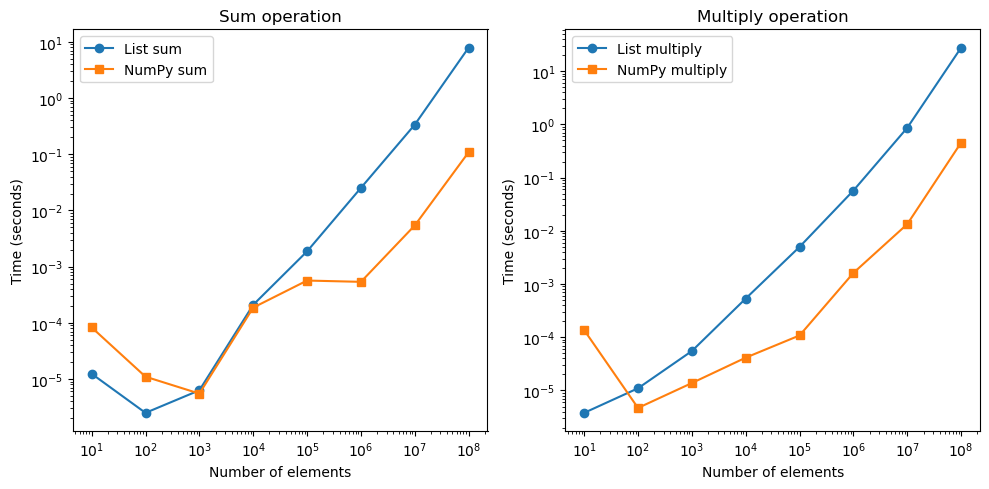

In [47]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Sizes of data to test
sizes = [10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

# To store timings
list_times = {"sum": [], "multiply": []}
numpy_times = {"sum": [], "multiply": []}

for n in sizes:
    # Prepare data
    py_list = list(range(n))
    np_array = np.arange(n)
    
    # --- SUM operation ---
    start = time.perf_counter()
    sum(py_list)
    end = time.perf_counter()
    list_times["sum"].append(end - start)
    
    start = time.perf_counter()
    np_array.sum()
    end = time.perf_counter()
    numpy_times["sum"].append(end - start)
    
    # --- MULTIPLY operation (elementwise ×2) ---
    start = time.perf_counter()
    [x*2 for x in py_list]
    end = time.perf_counter()
    list_times["multiply"].append(end - start)
    
    start = time.perf_counter()
    np_array * 2
    end = time.perf_counter()
    numpy_times["multiply"].append(end - start)

# --- Plotting results ---
plt.figure(figsize=(10,5))

# Sum comparison
plt.subplot(1, 2, 1)
plt.plot(sizes, list_times["sum"], label="List sum", marker="o")
plt.plot(sizes, numpy_times["sum"], label="NumPy sum", marker="s")
plt.xlabel("Number of elements")
plt.ylabel("Time (seconds)")
plt.title("Sum operation")
plt.legend()
plt.xscale("log")
plt.yscale("log")

# Multiply comparison
plt.subplot(1, 2, 2)
plt.plot(sizes, list_times["multiply"], label="List multiply", marker="o")
plt.plot(sizes, numpy_times["multiply"], label="NumPy multiply", marker="s")
plt.xlabel("Number of elements")
plt.ylabel("Time (seconds)")
plt.title("Multiply operation")
plt.legend()
plt.xscale("log")
plt.yscale("log")

plt.tight_layout()
plt.show()
